<a href="https://colab.research.google.com/github/ftosse/ITU-R.676-R.838/blob/master/atenuaciones-full-michael.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/jakevdp/PythonDataScienceHandbook.git cloned-repo
%cd cloned-repo
!ls

In [2]:
pip install itur 


In [3]:
pip install cartopy

     |████████████████████████████████| 10.8 MB 6.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 29.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 1.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 23.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 44 kB 3.0 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516272 sha256=4434af028d2f51edf7f9ea11ea5027f2e95cda5bcef35c7ac5c93933e7c7344c
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
Successfully built cartopy


In [5]:
!pip install pyproj==1.9.6

/usr/local/lib/python3.7/dist-packages/itur/models/itu676.py:302: RuntimeWarning: The approximated method to compute the gaseous attenuation in recommendation ITU-P 676-11 is only recommended for elevation angles between 5 and 90 degrees
  'The approximated method to compute '


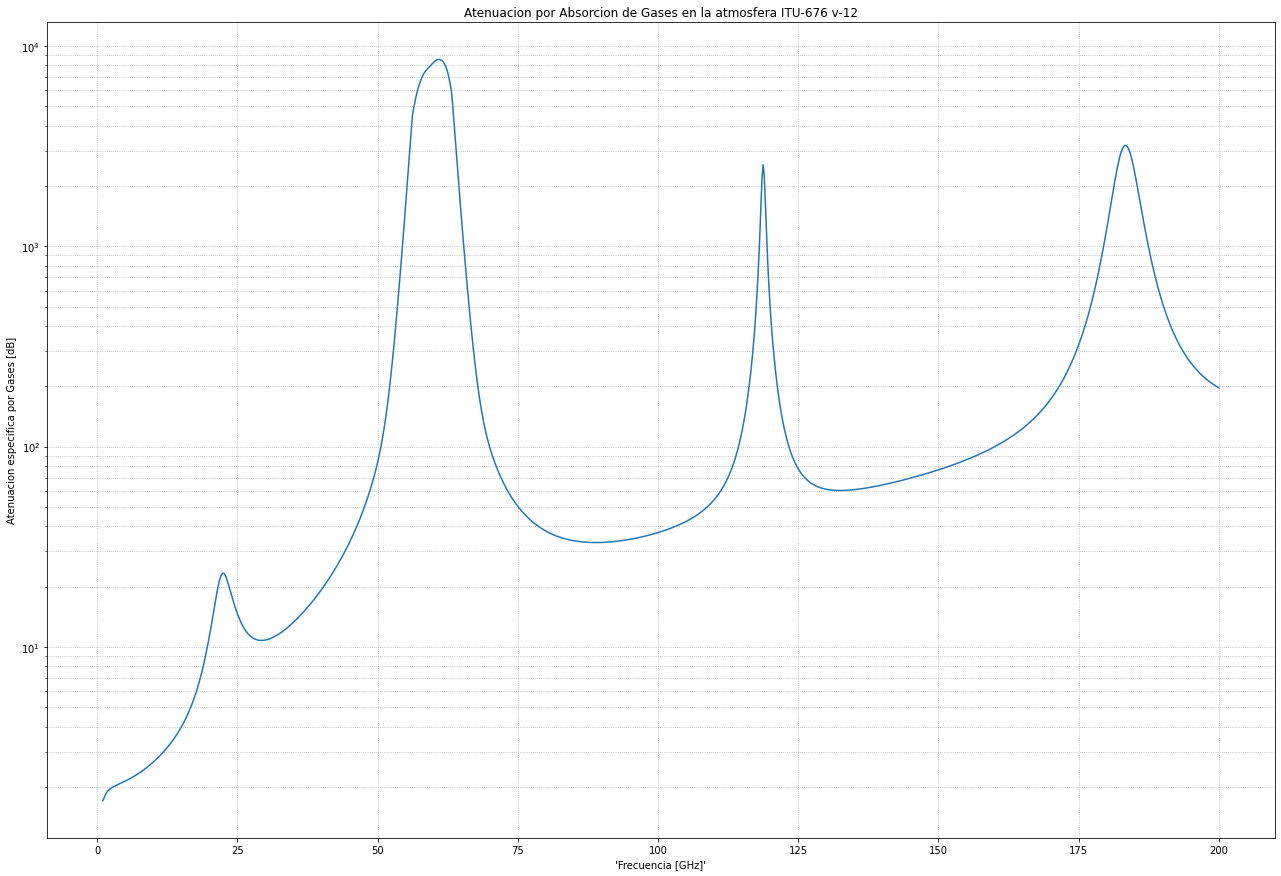

In [6]:
import itur
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter



el = 1
rho = 7.5 * u.g / u.m**3
P = 1013 * u.hPa
T = 25 * u.deg_C
f = np.linspace(1, 200, 1000)
Att_aprox=itur.models.itu676.gaseous_attenuation_slant_path(f, el, rho, P, T, V_t=None, h=None)
Att = itur.gaseous_attenuation_slant_path(f, el, rho, P, T)
#print(Att)
fig, ax = plt.subplots(figsize=(22, 15))
#plt.subplot(figsize=(22,15))
ax.semilogy(f, Att_aprox)
#plt.xlabel('Frecuencia [GHz]')
#plt.ylabel('Atenuacion por Gases [dB]')
ax.grid(which='both', linestyle=':')
#plt.title('Atenuacion por Absorcion de Gases en la atmosfera ITU-676 v-12')
ax.set(title = "Atenuacion por Absorcion de Gases en la atmosfera ITU-676 v-12",
       xlabel = "'Frecuencia [GHz]'",
       ylabel = "Atenuacion especifica por Gases [dB]")

fig.savefig('Atenuacion-gases.pdf')


In [7]:
import csv
  
# Example.csv gets created in the current working directory 
with open('Att_aprox.csv', 'w', newline = '') as csvfile:
    my_writer = csv.writer(csvfile, delimiter = ',')
    my_writer.writerow(Att_aprox)

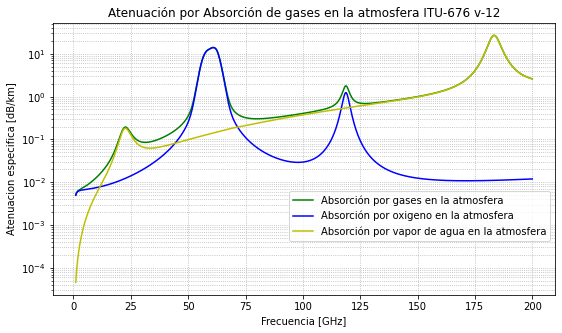

In [9]:
gamma=itur.models.itu676.gamma_exact(f, P, rho, T)
gammao=itur.models.itu676.gamma0_exact(f,P,rho, T)
gammaw=itur.models.itu676.gammaw_exact(f, P, rho, T)
fig, ax = plt.subplots(figsize=(9, 5))
#plt.subplot(figsize=(22,15))
ax.semilogy()
#############################################Etiquetas####################################
ax.plot(f,gamma,'g',label='Absorción por gases en la atmosfera')
ax.plot(f,gammao,'b',label='Absorción por oxigeno en la atmosfera')
ax.plot(f,gammaw,'y',label='Absorción por vapor de agua en la atmosfera')
#ax.plot(d,Atenuacion_lluvia[2],'g',label='Intensidad de lluvia (12.5 mm/h) - Lluvia Media')
#ax.plot(d,Atenuacion_lluvia[3],'y',label='Intensidad de lluvia (25 mm/h) - Lluvia Moderada')
#ax.plot(d,Atenuacion_lluvia[4],'d',label='Intensidad de lluvia (50 mm/h) - Aguacero')
#############################forma de la Grilla o malla##################################
ax.grid(which='both', linestyle=':')
####################Titulos ejes#########################################################
ax.set(title = "Atenuación por Absorción de gases en la atmosfera ITU-676 v-12",
       xlabel = "Frecuencia [GHz]",
       ylabel = "Atenuacion especifica [dB/km]")
######################################Agregar etiquetas a la figura######################
ax.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.4))

fig.savefig('Atenuacion-finaltotal.pdf')

3
200
5
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------


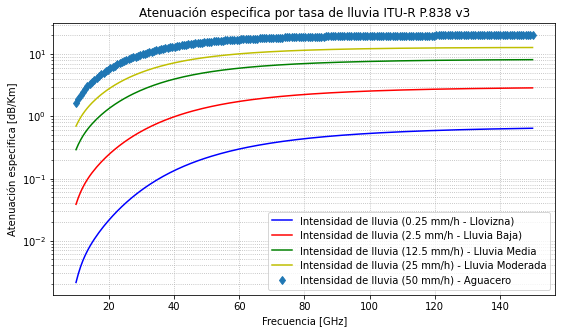

In [10]:
vr=itur.models.itu838.get_version()
print(vr)
fr=np.linspace(10,150,200)
print(len(fr))
#fr=np.arange(10,100,40)
R =[0.25, 2.5, 12.5, 25, 50]
print(len(R))
tau=0
#tau=np.zeros(1, dtype = int)
el = 0
#fr= [28, 60, 73]
#R=[5.5, 25]
#R=np.linspace(0.25, 10, 6)
#print(fr)
Ar=itur.models.itu838.rain_specific_attenuation_coefficients(fr, el, tau)
#Ar=itur.models.itu838.rain_specific_attenuation(R,fr, el,tau)
print('-----------------------------------------------------------------------------')
#print(Ar)
#Ar=Ar.reshape(4,2)
k=Ar[:,0]
alpha=Ar[:,1]
Atenuacion_lluvia=[]
#for i in R:
#  Atenuacion_lluvia= k*i**alpha 
Atenuacion_lluvia=[k*(r**alpha) for r in R]
#print(k)
print('-----------------------------------------------------------------------------')
print('-----------------------------------------------------------------------------')
#print(alpha)
print('-----------------------------------------------------------------------------')
print('-----------------------------------------------------------------------------')
#print(Atenuacion_lluvia)
print('-----------------------------------------------------------------------------')
#print(k)
fig, ax = plt.subplots(figsize=(9, 5))

#ax.plot()
#ax.loglog()
ax.semilogy()
#############################################Etiquetas####################################
ax.plot(fr,Atenuacion_lluvia[0],'b',label='Intensidad de lluvia (0.25 mm/h - Llovizna)')
ax.plot(fr,Atenuacion_lluvia[1],'r',label='Intensidad de lluvia (2.5 mm/h - Lluvia Baja)')
ax.plot(fr,Atenuacion_lluvia[2],'g',label='Intensidad de lluvia (12.5 mm/h) - Lluvia Media')
ax.plot(fr,Atenuacion_lluvia[3],'y',label='Intensidad de lluvia (25 mm/h) - Lluvia Moderada')
ax.plot(fr,Atenuacion_lluvia[4],'d',label='Intensidad de lluvia (50 mm/h) - Aguacero')
#############################forma de la Grilla o malla##################################
ax.grid(which='both', linestyle=':')
####################Titulos ejes#########################################################
ax.set(title = "Atenuación especifica por tasa de lluvia ITU-R P.838 v3",
       xlabel = "Frecuencia [GHz]",
       ylabel = "Atenuación especifica [dB/Km]")
######################################Agregar etiquetas a la figura######################
ax.legend( bbox_to_anchor=(0, 0, 1, 0.8))
##################################Guardar la figura######################################
plt.savefig('atenuacion_lluvia.pdf')

print('-----------------------------------------------------------------------------')


28
-----------------------------------------------------------------------------
[0.20076879 0.94820533]
[0.99971005 0.99970133 0.9996926  0.99968388 0.99967515 0.99966643
 0.9996577  0.99964898 0.99964026 0.99963153 0.99962281 0.99961409
 0.99960536 0.99959664 0.99958792 0.99957919 0.99957047 0.99956175
 0.99955303 0.9995443  0.99953558 0.99952686 0.99951814 0.99950942
 0.9995007  0.99949197 0.99948325 0.99947453 0.99946581 0.99945709
 0.99944837 0.99943965 0.99943093 0.99942221 0.99941349 0.99940477
 0.99939605 0.99938733 0.99937861 0.99936989 0.99936117 0.99935245
 0.99934374 0.99933502 0.9993263  0.99931758 0.99930886 0.99930014
 0.99929143 0.99928271 0.99927399 0.99926527 0.99925656 0.99924784
 0.99923912 0.99923041 0.99922169 0.99921297 0.99920426 0.99919554
 0.99918683 0.99917811 0.99916939 0.99916068 0.99915196 0.99914325
 0.99913453 0.99912582 0.9991171  0.99910839 0.99909967 0.99909096
 0.99908225 0.99907353 0.99906482 0.9990561  0.99904739 0.99903868
 0.99902996 0.99902125 0

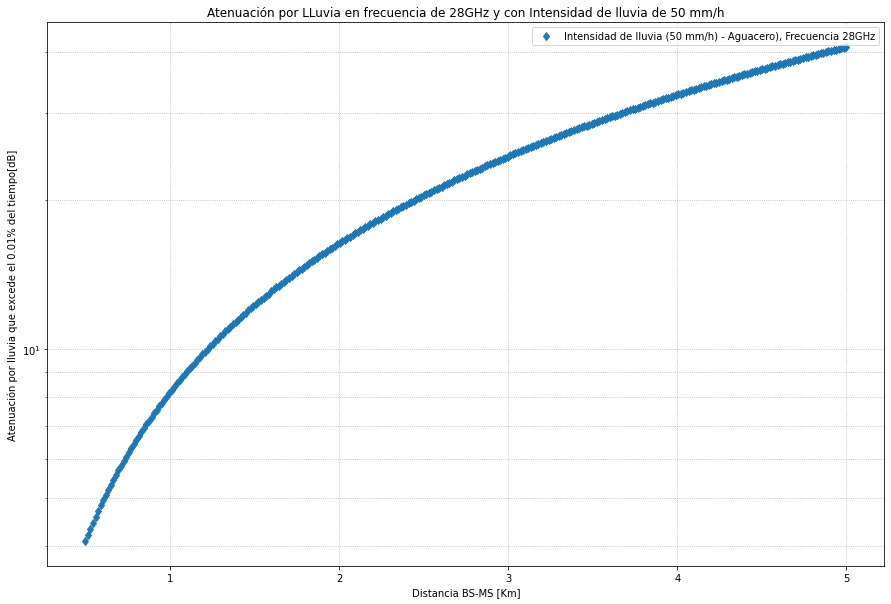

In [48]:
import math
 
fr=28
print(fr)
#R =[0.25, 2.5, 12.5, 25, 50]
R =50
#print(len(R))
tau=45
el = 0
Ar=itur.models.itu838.rain_specific_attenuation_coefficients(fr, el, tau)
#Ar=itur.models.itu838.rain_specific_attenuation(R,fr, el,tau)
print('-----------------------------------------------------------------------------')
print(Ar)
#Ar=Ar.reshape(4,2)
k=Ar[0]
alpha=Ar[1]
Atenuacion_lluvia=[]
#for i in R:
#  Atenuacion_lluvia= k*i**alpha 
#Atenuacion_lluvia=[k*(rain**alpha) for rain in R]
#####################################################IMPLEMENTACION EN DISTANCIAS#####
#################Para obtener dB en la atenuacion por lluvia ITU-R P.530 vs10
d=np.linspace(0.5,5,300)
do=35*math.exp(-0.015)*R
#print(do)
r=1/(1+(d/do)) 
print(r)
deff=r*d
#print(deff)
ar=k*(R**alpha)
#print(ar)
Atenuacion_lluvia=[ar*m for m in deff]
#Atenuacion_lluvia=[k*(r**alpha) for r in R]
print(Atenuacion_lluvia)
#print(k)
print('-----------------------------------------------------------------------------')
print('-----------------------------------------------------------------------------')
#print(alpha)
print('-----------------------------------------------------------------------------')
print('-----------------------------------------------------------------------------')
#print(Atenuacion_lluvia)
print('-----------------------------------------------------------------------------')
#print(k)
fig, ax = plt.subplots(figsize=(15, 10))

#ax.loglog()
#ax.loglog()
ax.semilogy()
#ax.plot()
#############################################Etiquetas####################################
#ax.plot(d,Atenuacion_lluvia[0,:],'b',label='Intensidad de lluvia (0.25 mm/h - Llovizna), Frecuencia 28GHz')
#ax.plot(d,Atenuacion_lluvia[1],'r',label='Intensidad de lluvia (2.5 mm/h - Lluvia Baja), Frecuencia 28GHz')
#ax.plot(d,Atenuacion_lluvia[2],'g',label='Intensidad de lluvia (12.5 mm/h) - Lluvia Media), Frecuencia 28GHz')
#ax.plot(d,Atenuacion_lluvia[3],'y',label='Intensidad de lluvia (25 mm/h) - Lluvia Moderada), Frecuencia 28GHz')
ax.plot(d,Atenuacion_lluvia,'d',label='Intensidad de lluvia (50 mm/h) - Aguacero), Frecuencia 28GHz')
#############################################Etiquetas####################################
#ax.plot(d,Atenuacion_lluvia[0],'b',label='Intensidad de lluvia (10 mm/h - Aguacero), Frecuencia 28GHz')
#############################forma de la Grilla o malla##################################
ax.grid(which='both', linestyle=':')
####################Titulos ejes#########################################################
ax.set(title = "Atenuación por LLuvia en frecuencia de 28GHz y con Intensidad de lluvia de 50 mm/h",
       xlabel = "Distancia BS-MS [Km]",
       ylabel = "Atenuación por lluvia que excede el 0.01% del tiempo[dB]")
######################################Agregar etiquetas a la figura######################
ax.legend()
##################################Guardar la figura######################################
plt.savefig('atenuacion_lluvia_final.pdf')

print('-----------------------------------------------------------------------------')
